In [64]:
import numpy as np
import pandas as pd
import random as rnd
import os
print(os.listdir("../Movie Rating/input"))

['movies.dat', 'ratings.dat', 'users.dat']


In [65]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [67]:
df_movie = pd.read_csv("../Movie Rating/input/movies.dat", sep = '::',engine='python')
df_movie.columns = ['MovieIds','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()


,MovieIds,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [68]:
df_rating = pd.read_csv("../Movie Rating/input/ratings.dat",sep='::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [69]:
df_user = pd.read_csv("../Movie Rating/input/users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [70]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIds,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


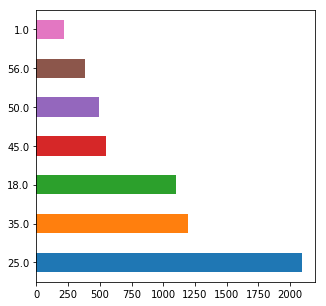

In [71]:
df['Age'].value_counts().plot(kind='barh',alpha=1,figsize=(5,5))
plt.show()

Text(0.5, 0, 'Age')

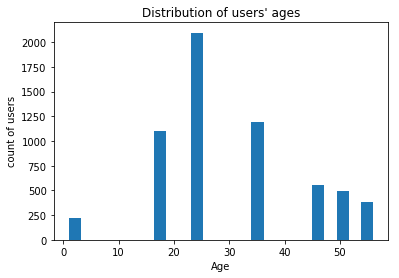

In [72]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [73]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


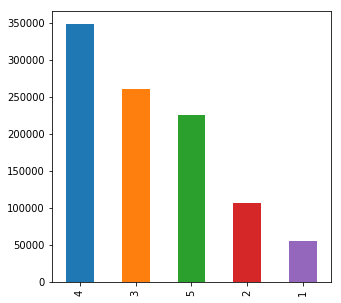

In [74]:
df['Ratings'].value_counts().plot(kind='bar',alpha=1,figsize=(5,5))
plt.show()

In [75]:
groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')

In [76]:
movies = groupedby_movieName.size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                                              1
Only Angels Have Wings (1939)                                       1
Only You (1994)                                                     1
Open Season (1996)                                                  1
Open Your Eyes (Abre los ojos) (1997)                               1
Operation Condor (Feiying gaiwak) (1990)                            1
Operation Condor 2 (Longxiong hudi) (1990)                          1
Operation Dumbo Drop (1995)                                         1
Opportunists, The (1999)                                            1
Opposite of Sex, The (1998)                                         1
Ordinary People (1980)                                              1
Orgazmo (1997)                                                      1
Original Gangstas (1996)                                            1
Onegin (1999)                                                       1
Original K

In [77]:
movie_data = groupedby_movieName.get_group('Jumanji (1995)')
movie_data.shape

(1, 13)

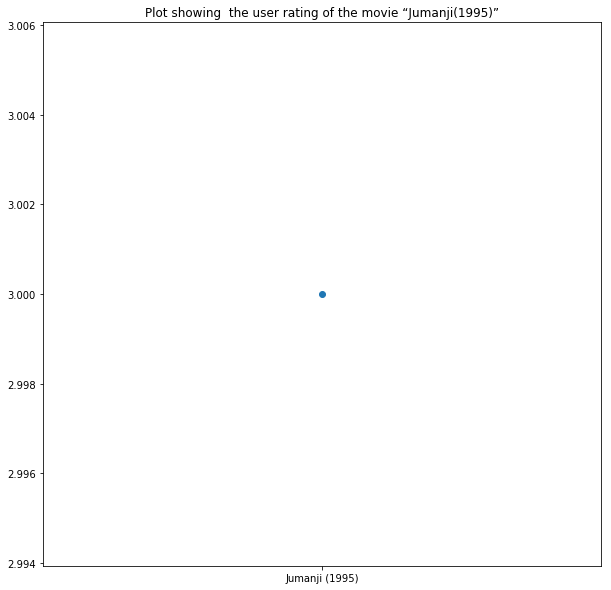

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(movie_data['MovieName'],movie_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Jumanji(1995)”')
plt.show()

In [79]:
movie_data[['MovieName','age_group']]

,MovieName,age_group
0,Jumanji (1995),50-59


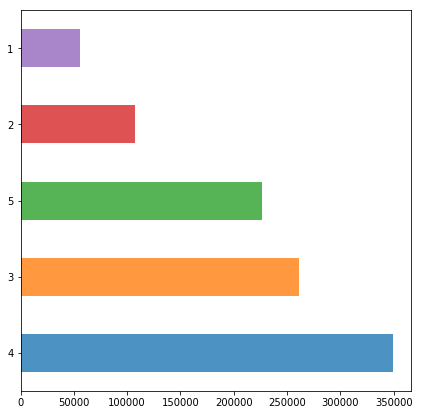

In [80]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.8,figsize=(7,7))
plt.show()

In [81]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


In [82]:
first_500 = df[500:]
first_500.dropna(inplace=True)

C:\Users\mdana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [84]:
#Use rating as label
labels = first_500[['Ratings']].values

In [85]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Ratings')

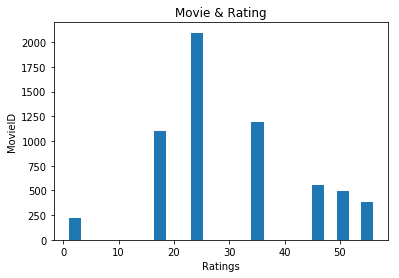

In [87]:
#Create a histogram for movie
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

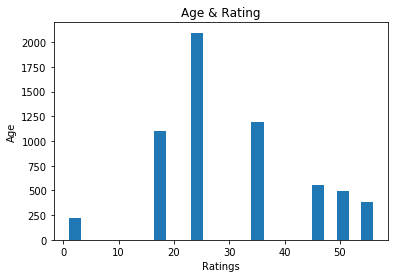

In [88]:
#Create a histogram for age
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

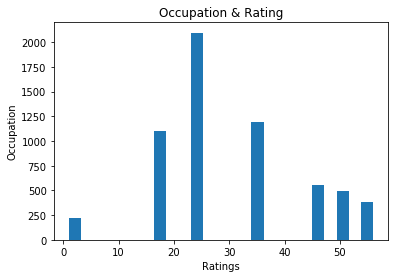

In [89]:
#Create a histogram for occupation
df.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [107]:
# Logistic Regression

logreg = LogisticRegression(solver='lbfgs',multi_class='ovr')
model = logreg.fit(train, train_labels.ravel())
Y_pred = model.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

33.07

In [114]:
# Support Vector Machines

svc = SVC(gamma='auto')
model= svc.fit(train, train_labels.ravel())
Y_pred = model.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

96.42

In [115]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
model=knn.fit(train, train_labels.ravel())
Y_pred = model.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

57.57

In [116]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
model=gaussian.fit(train, train_labels.ravel())
Y_pred = model.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

32.23

In [123]:
# Perceptron

perceptron = Perceptron(tol=1e-3,max_iter=1000)
model=perceptron.fit(train, train_labels.ravel())
Y_pred = model.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

21.77

In [131]:
# Linear SVC

linear_svc = LinearSVC(max_iter=10000,dual = False)
model= linear_svc.fit(train, train_labels.ravel())
Y_pred = model.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

32.72

In [134]:
# Stochastic Gradient Descent

sgd = SGDClassifier(tol=1e-3,max_iter=10000)
sgd.fit(train, train_labels.ravel())
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

28.61

In [135]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

In [136]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels.ravel())
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

98.5

In [137]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,98.54
3,Random Forest,98.50
0,Support Vector Machines,96.42
1,KNN,57.57
2,Logistic Regression,33.07
7,Linear SVC,32.72
4,Naive Bayes,32.23
6,Stochastic Gradient Decent,28.61
5,Perceptron,21.77
